## 7.1 Introdução

As leis fundamentais da física, mecânica, eletrônica e termodinâmica, em geral, são baseadas em observações empíricas que explicam a variação das propriedades físicas e dos estados dos sistemas. Em vez de descrever os estados de sistemas físicos diretamente, as leis geralmente são dadas em termos de variações espaciais e temporais.

Diversos exemplos estão listados na tabela a seguir. Essas leis definem mecanismos de variação. Quando combinadas com as leis de continuidade da energia, da massa e do momento, produzem equações diferenciais. A integração subsequente dessas equações diferenciais resulta em funções matemáticas que descrevem o estado espacial e temporal de um sistema em termos da variação de energia, massa ou velocidade (Chapra e Canale, 2016).

A importância dos métodos numéricos para a resolução de equações diferenciais ordinárias (EDOs) deve-se ao fato de que essas equações ocorrer com frequência em modelos matemáticos com aplicação em diferentes situações práticas, nas áreas de engenharia, física, biologia, economia, biomedicina, etc.

Tipicamente, problemas que relacionam funções de uma variável e suas derivadas levam a uma equação diferencial ordinária. Métodos numéricos são utilizados para resolução dessas equações diferenciais, pois com frequência soluções exatas não são possíveis, ou muito difícil de serem determinadas.

Uma equação diferencial ordinária é uma equação que relaciona uma função de uma variável, $y(x)$ e suas derivadas, sendo $x$ a variável independente e $y(x)$ a função incógnita.

A ordem de uma equação diferencial é determinada pela mais alta ordem da derivada da função $y(x)$ presente na equação. As equações a seguir são exemplos de equações diferenciais ordinárias. Temos as seguintes notações usuais:

$$y'= \frac{dy}{dx}, \,\,\,  y''= \frac{d^2y}{dx^2}, \,\,\,... $$

Por exemplo:

$ \frac{dy}{dx} = 3x-1$ é uma EDO de ordem 1

$ y' = -xy$ é uma EDO de ordem 1

$ \frac{d^2y}{dx^2} = x^2-y+e^x$ é uma EDO de ordem 2 

$ y'' -4y' + 3y = x$ é uma EDO de ordem 2 


Resolver uma equação diferencial consiste em determinar uma função 𝑦(𝑥) que satisfaça a equação.

**Exemplo 7.1.1:** A equação diferencial $y' = -x y$ tem solução $ y = c \, e^{\frac{-x^2}{2}}$ com $c$ constante, pois 

$$ y' = c \, e^{\frac{-x^2}{2}}(-x) = -xy$$

ou seja, a função $y(x)$ satisfaz a equação. 

Podemos observar que esta equação apresenta infinitas soluções, pois, para cada valor diferente de $c$ temos uma solução diferente.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(4,3)

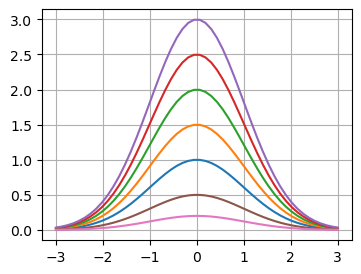

In [5]:
y = lambda x: np.exp((-x**2)/2)
X = np.linspace(-3,3)
plt.plot(X,1*y(X), 
         X,1.5*y(X), 
         X,2*y(X), 
         X,2.5*y(X), 
         X,3*y(X), 
         X,0.5*y(X),
         X,0.2*y(X))
plt.grid()
plt.show()

**Exemplo 7.1.2:** A equação diferencial $\frac{du}{dt} = t + 2$ tem solução obtida facilmente integrando ambos os lados fazendo

$$ \int \frac{du}{dt}  = \int (t+2)dt $$

$$ u(t) = \frac{t^2}{2}+2t+k$$

em que $k$ é a constante de integração. Nesse caso a família de soluções, para $k=\{-1,0,1,5,10,15, 20\}$ pode ser visualizada como é mostrado abaixo.a


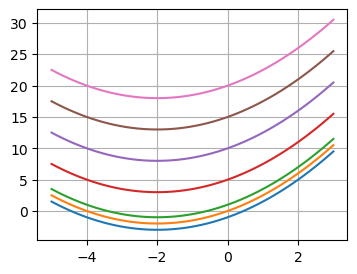

In [6]:
u = lambda t: (t**2/2)+2*t
t = np.linspace(-5,3)
plt.plot(t,u(t)-1, 
         t,u(t)-0, 
         t,u(t)+1,
         t,u(t)+5, 
         t,u(t)+10,
         t,u(t)+15,
         t,u(t)+20,)
plt.grid()
plt.show()

Se impomos uma condição, como por exemplo $u(0)= 8$, obtemos o valor $k=8$, que restringe a solução a uma única curva e não mais à uma família de curvas. Uma equação diferencial com condições iniciais como essa compõem o que chamamos de um *problema de valor inicial* (PVI). 

Ou seja, o problema de valor inicial descrito acima pode ser enunciado como

$$ 
\begin{cases} 
\frac {du}{dt}= t+2\\ 
\\
u(0)=8
\end{cases}$$

Resolução de um PVI **usando SciPy** ([Referência](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)):

In [7]:
from scipy.integrate import solve_ivp

In [8]:
def du(t, u): return t+2  
t0 = 0.0
tf = 5.0
u0 = [8]
ti = np.linspace(t0,tf,20)

sol = solve_ivp(du, (t0,tf), u0, t_eval=ti)
sol.y 

array([[ 8.        ,  8.56094183,  9.19113573,  9.89058172, 10.65927978,
        11.49722992, 12.40443213, 13.38088643, 14.4265928 , 15.54155125,
        16.72576177, 17.97922438, 19.30193906, 20.69390582, 22.15512465,
        23.68559557, 25.28531856, 26.95429363, 28.69252078, 30.5       ]])

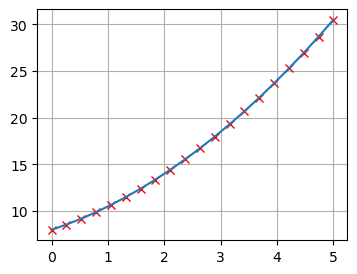

In [9]:
plt.plot(ti, sol.y[0],'rx', ti, u(ti)+u0[0])
plt.grid()
plt.show()

E existência e unicidade da solução de um PVI é garantida, sob certas condições, pelos teoremas *Condição de Lipschits*, *Pincard-Lindelof* e *Dependência contínua na condição inicial* enunciados e demonstrados em Medeiros e Oliveira (2020, p.24, http://www.mat.ufpb.br/milton/disciplinas/edo/livro_edo.pdf)

### Problema de valor Inicial (PVI)

Considere a equação diferencial ordinária, $y' = y$, cuja solução é dada por $y(x)=ce^x$ $c\in R$.

Assim, a equação diferencial dada apresenta infinitas soluções, uma vez que, para cada valor escolhido para a constante $c$, temos uma solução, como, por exemplo, $y(x)=c_0e^x$,$y(x)=c_1e^x$,$y(x)=c_2e^x$,sendo $c_0$, $c_1$ , $c_2$ valores fixados,conforme exibido na figura abaixo.

<img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/7_EQUACOES_DIFERENCIAIS_ORDINARIAS/imagens/pvi01.png" width="480">

Se considerarmos que conhecemos o valor da função $y(x)$ em um ponto, isto é, $x = x_0$ , o valor de $y(x)$ é $y(x_0) = y_0$ e temos uma única solução para a equação proposta. Esta solução única é obtida quando usamos a solução geral da equação diferencial
no ponto $x = x_0$ e obtemos o valor da constante $c$, como segue: $$y(x_0)=y_0$$ 
então 
$$ce^{x_0} = y_0$$ 
logo 
$$c=y_0e^{0-x_0}$$

Assim, a solução única para a equação diferencial é dada por: 

$$y(x) = ce^x = y_0 e^{-x_0} e^x = y_0e^{(x-x_0)}$$

Portanto, $y(x) = y_0 e^{(x-x_0)}$, conforme exibido na figura.


Um **Problema de Valor Inicial (PVI)** de primeira ordem consiste de uma equação diferencial $y' = f (x,y)$, $x \geq x_0$ e uma condição inicial $y(x_0) = y_0$, em que $y_0$ é um valor dado, chamado de valor inicial.

Neste caso, podemos escrever o PVI da seguinte forma:

$$ 
\begin{cases} 
y'= f(x,y)\\ 
\\
y(x_0)=y_0
\end{cases}$$

Resolver o PVI consiste em determinar uma função $y(x)$ que satisfaça a equação diferencial $y' = f (x,y)$ e a condição inicial $y(x_0) = y_0$.

Se a função $f$ e $ \frac{\partial f}{\partial y}$ são contínuas, temos que o PVI apresenta solução única.



**Discretização:** Resolver numericamente um PVI consiste em calcular aproximações para $y = y(x)$ em pontos discretos $x_0,x_1,x_2,...,x_N$ de um intervalo $[a,b]$.

Para discretizar o intervalo $[a,b]$, tomamos $N$ subintervalos $(N \geq 1)$ e fazemos $x_n = x_0 + nh$, $n = 0,1,2,...,N$ com $x_0 =a$ e $x_N =b$,sendo $h = (x_N −x_0)/N$.

A este conjunto de pontos $x_0,x_1,x_2,...,x_N$ denominamos rede ou malha de pontos discretos, e calculamos aproximações para a função $y(x)$ nestes pontos, isto é, determinamos $y_n$ tal que $y_n \approx y(x_n)$, $n=0,1,...,N$.

A partir de um ponto inicial dado $y(x_0) = y_0$ (valor inicial), calculamos passo a passo, nos pontos 

$x_1 = x_0 +h$, 

$x_2 = x_0 +2h$, 

$x_3 = x_0 +3h$

,...,

$x_n = x_0 +nh$, 

soluções aproximadas $y_n$ para a solução exata $y(x_n)$, $n=0,1,2,...,N$, conforme ilustrado na figura a seguir.

<img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/7_EQUACOES_DIFERENCIAIS_ORDINARIAS/imagens/discretizacao.png" width="480">